In [1]:
from ConnectFourBoard import ConnectFourBoard
from QLearningAgent import DQNAgent
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def train_agent(agent, episodes=5000, eval_every=1000, eval_games=100):
    rewards = []
    win_percentages = []

    for ep in range(1, episodes + 1):
        state, _ = agent.env.reset()
        done = False
        total_reward = 0

        while not done:
            if agent.env.current_player == 1:
                # Agent's turn
                action = agent.select_action(state)
                next_state, reward, done, _, _ = agent.env.step(action)
                agent.store_transition(state, action, reward, next_state, done)
                agent.update()
                state = next_state
            else:
                # Opponent is random
                action = random.choice(agent.env.get_available_actions())
                state, reward, done, _, _ = agent.env.step(action)

        total_reward = agent.env.winner
        rewards.append(total_reward)

        agent.epsilon = max(agent.epsilon_end,
                            agent.epsilon * agent.epsilon_decay)

        if ep % agent.target_update_freq == 0:
            agent.target_net.load_state_dict(agent.q_net.state_dict())

       # Evaluate against random baseline
        if ep % eval_every == 0:
            # Temporarily turn off exploration
            epsilon_temp = agent.epsilon
            agent.epsilon = 0.0

            win_count = 0
            for _ in range(eval_games):
                state, _ = agent.env.reset()
                done = False
                while not done:
                    if agent.env.current_player == 1:
                        action = agent.select_action(state)
                    else:
                        action = random.choice(agent.env.get_available_actions())
                    state, reward, done, _, _ = agent.env.step(action)

                if agent.env.winner == 1:
                    win_count += 1

            # Restore exploration
            agent.epsilon = epsilon_temp

            win_percentage = (win_count / eval_games) * 100
            win_percentages.append(win_percentage)
            print(f"Episode {ep}: Agent won {win_percentage:.2f}% against random baseline")
                
    plt.plot(range(eval_every, episodes + 1, eval_every), win_percentages)
    plt.xlabel("Training Episodes")
    plt.ylabel("Win % vs Random Baseline")
    plt.title("DQN Agent Evaluation Performance")
    plt.grid(True)
    plt.show()

    return rewards, win_percentages

In [3]:
eval_every = 1000
episodes = 100000
env = ConnectFourBoard()
agent = DQNAgent(env, device="cuda" if torch.cuda.is_available() else "cpu")

Episode 1000: Agent won 27.00% against random baseline
Episode 2000: Agent won 34.00% against random baseline
Episode 3000: Agent won 58.00% against random baseline
Episode 4000: Agent won 89.00% against random baseline
Episode 5000: Agent won 56.00% against random baseline
Episode 6000: Agent won 66.00% against random baseline
Episode 7000: Agent won 83.00% against random baseline
Episode 8000: Agent won 65.00% against random baseline
Episode 9000: Agent won 85.00% against random baseline
Episode 10000: Agent won 71.00% against random baseline
Episode 11000: Agent won 71.00% against random baseline
Episode 12000: Agent won 83.00% against random baseline
Episode 13000: Agent won 62.00% against random baseline
Episode 14000: Agent won 78.00% against random baseline
Episode 15000: Agent won 69.00% against random baseline
Episode 16000: Agent won 73.00% against random baseline
Episode 17000: Agent won 74.00% against random baseline
Episode 18000: Agent won 65.00% against random baseline
E

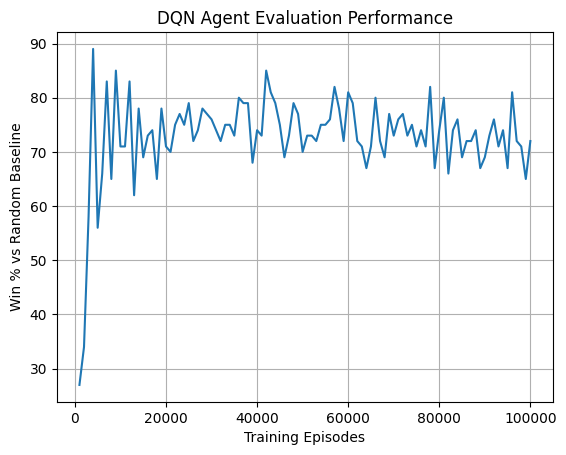

In [4]:
rewards, win_percentages = train_agent(
    agent, episodes=episodes, eval_every=eval_every, eval_games=100
)

In [6]:
# Save the results rewards and win percentages in a file
np.savez(
    "training_results_random_random.npz",
    rewards=rewards,
    win_percentages=win_percentages,
)